# Project: TMDb movie data

## Table of Contents



<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), each row represent a movie with corresponding related data. Relevant data to be used in the following analysis include the following variables:

    - imdb_id
    - popularity
    - revenue
    - original_title
    - cast
    - director
    - genres
    - production_companies
    - vote_average
    - release_year
    
In this report, I explore the following questions:

    Q1. Which genres are most popular from year to year?
    Q2. Which genres are most popular for all time?
    Q3. Which company made the largest revenue in all time?
    Q4. Which company has produced the biggest number of movies?
    Q5. Who is the most popular actor?
    Q6. Who did spend the most of his life acting?
    Q7. Which actor whose movies were always voted great?
    Q8. Who is the most frequent star cast?
    Q9. Who directed the largest number of movies?
    Q10. Which director is the best according to users votes?
    Q11. Which director did generate the largest revenues?
    Q12. Do average ratings improve over the years?
    Q13. How are revenues trending over time?
    Q14. How does number of movies produced differs yearly?
    Q15. How is popularity trending over time?
    Q16. Do top ratings movies always generate big revenue?
    Q17. How is runtime trending over time?
    Q18. Is there any impact of popularity on revenue?
    Q19. What kinds of properties are associated with movies that have high revenues?

In [1]:
# importing required libraries ..
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import time
import seaborn as sns
sns.set_theme(style="darkgrid")

<a id='wrangling'></a>
## Data Wrangling


### 1) General Properties

In [2]:
# Reading CSV file ..
df = pd.read_csv('tmdb-movies.csv')

In [3]:
# Making sure the data is read properly ..
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Calculating how many rows and columns ..
df.shape

(10866, 21)

In [5]:
#   types and look for instances of missing or possibly errant data.
# Inspecting data types ..
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

> By looking at the data types, we can see that there are no problems except the **release_date** being a **string** not a **datetime**

In [6]:
# Looking for missing data
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
(df['revenue'] == 0).sum()

6016

> It seems that there is alot of missing data that need to be handled.

In [9]:
# Checking if there is any duplicates ..
df.duplicated().sum()

1

The following code is trying to know which movies that has no __IMDB id__ to be gathered __manually__ as they are only 10 movies ..

In [10]:
missing_id = df.query('imdb_id.isnull()', engine='python')['original_title']
missing_id 

548                          Sense8: Creating the World
997                Star Wars Rebels: Spark of Rebellion
1528                                 Hulk vs. Wolverine
1750                                      Hulk vs. Thor
2401    Opeth: In Live Concert At The Royal Albert Hall
4797                            Doctor Who: The Snowmen
4872                                        Party Bercy
6071                                   Portal: Survive!
7527                                Fallen: The Journey
7809                                Fallen: The Destiny
Name: original_title, dtype: object

By manually searching for the movies on IMDB, two movies were not found so we are dropping them.

In [11]:
df.drop(index = [4872,7809], inplace = True)

In [12]:
missing_id = df.query('imdb_id.isnull()', engine='python')['original_title']
missing_id 

548                          Sense8: Creating the World
997                Star Wars Rebels: Spark of Rebellion
1528                                 Hulk vs. Wolverine
1750                                      Hulk vs. Thor
2401    Opeth: In Live Concert At The Royal Albert Hall
4797                            Doctor Who: The Snowmen
6071                                   Portal: Survive!
7527                                Fallen: The Journey
Name: original_title, dtype: object

In [13]:
missing_ids = ["tt6963278","tt3816564","tt1602450","tt7884532","tt9256340","tt2380513","tt9755546","tt8936254"]

for i, id_ in enumerate(missing_id.index):
    print(i,id_)
    df.loc[id_,'imdb_id']=missing_ids[i]
    print("success!")
    

0 548
success!
1 997
success!
2 1528
success!
3 1750
success!
4 2401
success!
5 4797
success!
6 6071
success!
7 7527
success!


### 2) Data Cleaning (Replace this with more specific notes!)

In [14]:
# Converting release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [15]:
# Dropping the duplicated rows ..
df.drop_duplicates(inplace=True)

The columns __homepage__, __tagline__, __overview__ and __keywords__ are of no use to us in current time with too many NaN values.We are dropping them

In [16]:
df.drop(columns=['homepage','tagline','keywords','overview'],inplace = True)

#### Filling NaN Values

>This next step may take up to 3 hours of web scraping.. you might skip it to the next one to save time

In [44]:
for i in df.index:
    if (df.loc[i].isnull().sum() != 0) or (df.loc[i,'revenue'] == 0):
        request = requests.get('https://www.imdb.com/title/{}/'.format(df.loc[i,'imdb_id']))
        soup = BeautifulSoup(request.content,'lxml')
        print(i,' Started !')

        # Director Name
        if pd.isnull(df.loc[i,'director']) :
            try:
                df.loc[i,'director'] = soup.find(id="title-overview-widget").find(class_="credit_summary_item").find('a').contents[0]
            except:
                print('Error in gathering Director name. Filling with default value "No"')
                df.loc[i,'director'] = "No"

        # Genre
        if pd.isnull(df.loc[i,'genres']) :
            try:
                df.loc[i,'genres'] = soup.find(id="titleStoryLine").find_all(class_="see-more inline canwrap")[-1].get_text()[8:].strip().replace("\xa0","").replace("\n","").replace(" ","")
            except:
                print('Error in gathering Genre. Filling with default value "No"')
                df.loc[i,'genres'] = "No"

        # Cast
        if pd.isnull(df.loc[i,'cast']) :
            # for loop 5 times to get first 5 actors
            cast_names = []
            for j in range(5):
                try:
                    cast_name = soup.find(class_="cast_list").find_all(class_="primary_photo")[j].find('img').attrs['title']
                    cast_names.append(cast_name)
                except:
                    break
            df.loc[i,'cast'] = "|".join(cast_names)

        # Production Companies
        if pd.isnull(df.loc[i,'production_companies']) :
            try:
                co = soup.find(id="titleDetails").find("h4",string = "Production Co:")
                co_names = []
                for element in co.parent.find_all('a')[:-1]:
                    co_names.append(element.string.strip())
                df.loc[i,'production_companies'] = "|".join(co_names)
            except:
                print('Error in gathering Production Companies. Filling with default value "No"')
                df.loc[i,'production_companies'] = "No"

        # Revenue
        if df.loc[i,'revenue'] == 0 :
            try:
                rev = soup.find(string = "Cumulative Worldwide Gross:")
                df.loc[i,'revenue'] = rev.parent.next_sibling.string.strip().replace("$","").replace(",","")
            except:
                print('Error in gathering Revenue. Filling with default value "1"')
                df.loc[i,'revenue'] = 1

        print(i,' Finished !')
        
#fill not found cast with No
df['cast'].fillna('No',inplace=True)

74  Started !
Error in gathering Revenue. Filling with default value "1"
74  Finished !
92  Started !
Error in gathering Revenue. Filling with default value "1"
92  Finished !
100  Started !
Error in gathering Revenue. Filling with default value "1"
100  Finished !
116  Started !
Error in gathering Revenue. Filling with default value "1"
116  Finished !
140  Started !
Error in gathering Revenue. Filling with default value "1"
140  Finished !
159  Started !
Error in gathering Revenue. Filling with default value "1"
159  Finished !
165  Started !
Error in gathering Revenue. Filling with default value "1"
165  Finished !
175  Started !
Error in gathering Revenue. Filling with default value "1"
175  Finished !
181  Started !
Error in gathering Revenue. Filling with default value "1"
181  Finished !
185  Started !
Error in gathering Revenue. Filling with default value "1"
185  Finished !
194  Started !
Error in gathering Revenue. Filling with default value "1"
194  Finished !
204  Started !

398  Started !
Error in gathering Revenue. Filling with default value "1"
398  Finished !
400  Started !
Error in gathering Revenue. Filling with default value "1"
400  Finished !
401  Started !
Error in gathering Revenue. Filling with default value "1"
401  Finished !
402  Started !
Error in gathering Revenue. Filling with default value "1"
402  Finished !
404  Started !
Error in gathering Revenue. Filling with default value "1"
404  Finished !
407  Started !
Error in gathering Revenue. Filling with default value "1"
407  Finished !
410  Started !
Error in gathering Production Companies. Filling with default value "No"
Error in gathering Revenue. Filling with default value "1"
410  Finished !
414  Started !
Error in gathering Revenue. Filling with default value "1"
414  Finished !
415  Started !
Error in gathering Revenue. Filling with default value "1"
415  Finished !
416  Started !
Error in gathering Revenue. Filling with default value "1"
416  Finished !
418  Started !
Error in gat

538  Started !
Error in gathering Revenue. Filling with default value "1"
538  Finished !
539  Started !
Error in gathering Revenue. Filling with default value "1"
539  Finished !
540  Started !
Error in gathering Revenue. Filling with default value "1"
540  Finished !
541  Started !
Error in gathering Revenue. Filling with default value "1"
541  Finished !
543  Started !
Error in gathering Revenue. Filling with default value "1"
543  Finished !
544  Started !
Error in gathering Production Companies. Filling with default value "No"
544  Finished !
546  Started !
Error in gathering Revenue. Filling with default value "1"
546  Finished !
547  Started !
Error in gathering Revenue. Filling with default value "1"
547  Finished !
548  Started !
Error in gathering Revenue. Filling with default value "1"
548  Finished !
549  Started !
Error in gathering Revenue. Filling with default value "1"
549  Finished !
550  Started !
Error in gathering Production Companies. Filling with default value "No

KeyboardInterrupt: 

> In case you already ran the previous cell, There is no need to run the following. If not, be my guest!

In [17]:
# Reading gathered CSV file ..
df = pd.read_csv('gathered.csv')

#### Data Cleaning Summary:
After assesing the dataset, I found out that there is multible issues that need resolving, like:
- There were alot of missing data
- Duplication of data
- Columns that need to be converted to datetime object
 
My Solution for missing data was to:
- Scraping IMDB for any missing information using BeautifulSoup
- Replacing any not-found data with a default value in case the gathering process encountered a problem, it can be resumed without researching for the not-found data

>Many columns has data that is comined.
For example: the cast of the movie **Jurassic World** is written like this: **Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson**
The following function spread that data into a new data frame repeating other colomns in order to better explore it.

In [18]:
# this function iterates through the DF spliting data in selected cell into multiple cells
# split_col: The column in which data is being split
# col_list: a list that contains names of columns we need them in new DF

def splitter(split_col,col_list):
    df_split = []
    for i in df.query('({} != "No") and ({} != 1)'.format(split_col,split_col)).index:
        split_list = df.loc[i,split_col].split('|')
        for splt in split_list:
            split_dict = {}
            split_dict[split_col] = splt
            for col in col_list:
                split_dict[col]=df.loc[i,col]
            df_split.append(split_dict)
    return df_split

<a id='eda'></a>
## Exploratory Data Analysis





###     Q1. Which genres are most popular from year to year?

In [19]:
start = time.time()

df_genres = splitter("genres",["original_title","popularity","release_year"])
df_genres = pd.DataFrame(df_genres)
print(df_genres)
print(time.time()-start)



                genres            original_title  popularity  release_year
0               Action            Jurassic World   32.985763          2015
1            Adventure            Jurassic World   32.985763          2015
2      Science Fiction            Jurassic World   32.985763          2015
3             Thriller            Jurassic World   32.985763          2015
4               Action        Mad Max: Fury Road   28.419936          2015
...                ...                       ...         ...           ...
27005          Mystery       Beregis Avtomobilya    0.065141          1966
27006           Comedy       Beregis Avtomobilya    0.065141          1966
27007           Action    What's Up, Tiger Lily?    0.064317          1966
27008           Comedy    What's Up, Tiger Lily?    0.064317          1966
27009           Horror  Manos: The Hands of Fate    0.035919          1966

[27010 rows x 4 columns]
0.6841704845428467


In [20]:
grouped = df_genres.groupby(['release_year','genres'])['popularity'].sum()
grouped.groupby('release_year').idxmax()

release_year
1960        (1960, Drama)
1961        (1961, Drama)
1962        (1962, Drama)
1963     (1963, Thriller)
1964       (1964, Comedy)
1965        (1965, Drama)
1966        (1966, Drama)
1967        (1967, Drama)
1968        (1968, Drama)
1969        (1969, Drama)
1970        (1970, Drama)
1971        (1971, Drama)
1972        (1972, Drama)
1973        (1973, Drama)
1974        (1974, Drama)
1975        (1975, Drama)
1976        (1976, Drama)
1977    (1977, Adventure)
1978        (1978, Drama)
1979        (1979, Drama)
1980       (1980, Action)
1981    (1981, Adventure)
1982        (1982, Drama)
1983       (1983, Action)
1984       (1984, Action)
1985       (1985, Comedy)
1986        (1986, Drama)
1987       (1987, Comedy)
1988       (1988, Comedy)
1989       (1989, Comedy)
1990        (1990, Drama)
1991       (1991, Comedy)
1992       (1992, Comedy)
1993        (1993, Drama)
1994        (1994, Drama)
1995        (1995, Drama)
1996        (1996, Drama)
1997     (1997, Thriller)

In [21]:
grouped= grouped.unstack()
grouped= grouped.query('release_year > 2005')
grouped.fillna(0,inplace=True)

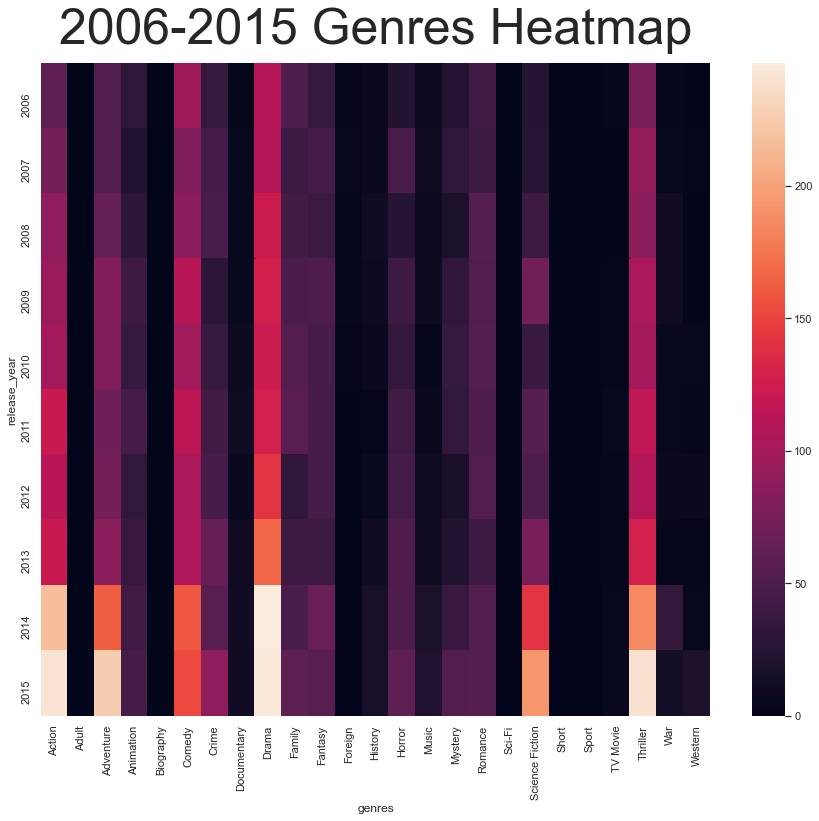

In [22]:
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(grouped)
heatmap.set_title('2006-2015 Genres Heatmap', fontdict={'fontsize':50}, pad=20);

### Q2. Which genres are most popular for all time?

In [23]:
df_genres.groupby('genres')['original_title'].count().sort_values()[-5:]

genres
Romance     1715
Action      2385
Thriller    2907
Comedy      3801
Drama       4768
Name: original_title, dtype: int64

## <p style="color:green">Production Companies Statistics</p>

In [24]:
start = time.time()
df_comp = splitter("production_companies",["original_title","popularity","release_year","revenue"])
df_comp = pd.DataFrame(df_comp)
print(df_comp)
print(time.time()-start)

              production_companies            original_title  popularity  \
0                Universal Studios            Jurassic World   32.985763   
1             Amblin Entertainment            Jurassic World   32.985763   
2               Legendary Pictures            Jurassic World   32.985763   
3          Fuji Television Network            Jurassic World   32.985763   
4                           Dentsu            Jurassic World   32.985763   
...                            ...                       ...         ...   
25329             Joel Productions                Grand Prix    0.065543   
25330  Douglas & Lewis Productions                Grand Prix    0.065543   
25331                      Mosfilm       Beregis Avtomobilya    0.065141   
25332      Benedict Pictures Corp.    What's Up, Tiger Lily?    0.064317   
25333                    Norm-Iris  Manos: The Hands of Fate    0.035919   

       release_year     revenue  
0              2015  1513528810  
1              2015

###     Q3. Which company made the largest revenue in all time?

In [25]:
df_comp.query('revenue > 1').groupby('production_companies')['revenue'].sum().sort_values()[-5:]

production_companies
Walt Disney Pictures                      34883925983
Twentieth Century Fox Film Corporation    38743454123
Paramount Pictures                        43707125247
Universal Pictures                        51224132552
Warner Bros.                              57474709317
Name: revenue, dtype: int64

###     Q4. Which company has produced the biggest number of movies?

In [26]:
df_comp.query('revenue > 1').groupby('production_companies')['original_title'].count().sort_values()[-5:]

production_companies
Twentieth Century Fox Film Corporation    255
Columbia Pictures                         262
Paramount Pictures                        410
Warner Bros.                              480
Universal Pictures                        482
Name: original_title, dtype: int64

## <p style="color:green">Actors Statistics</p>

In [27]:
start = time.time()
df_actors = splitter("cast",["original_title","release_year","popularity","vote_average"])
df_actors = pd.DataFrame(df_actors)
print(df_actors)
print(time.time()-start)

                      cast            original_title  release_year  \
0              Chris Pratt            Jurassic World          2015   
1      Bryce Dallas Howard            Jurassic World          2015   
2              Irrfan Khan            Jurassic World          2015   
3        Vincent D'Onofrio            Jurassic World          2015   
4            Nick Robinson            Jurassic World          2015   
...                    ...                       ...           ...   
52773     Harold P. Warren  Manos: The Hands of Fate          1966   
52774           Tom Neyman  Manos: The Hands of Fate          1966   
52775        John Reynolds  Manos: The Hands of Fate          1966   
52776         Diane Mahree  Manos: The Hands of Fate          1966   
52777    Stephanie Nielson  Manos: The Hands of Fate          1966   

       popularity  vote_average  
0       32.985763           6.5  
1       32.985763           6.5  
2       32.985763           6.5  
3       32.985763      

###  Q5. Who is the most popular actor?

In [28]:
df_actors.groupby('cast')['popularity'].sum().sort_values()[-5:]

cast
Bruce Willis         77.460368
Robert De Niro       78.091718
Harrison Ford        80.138138
Michael Caine        83.406456
Samuel L. Jackson    94.612089
Name: popularity, dtype: float64

###  Q6. Who did spend the most of his life acting?

In [29]:
gr1 = df_actors.groupby('cast')['release_year'].max()
gr2 = df_actors.groupby('cast')['release_year'].min()
gr = gr1 - gr2
gr.sort_values()[-5:]

cast
Shirley Jones       53
Tom Courtenay       53
Marlon Brando       54
Shirley MacLaine    54
Christopher Lee     55
Name: release_year, dtype: int64

### Q7. Which actor whose movies were always voted great?

In [30]:
df_actors.groupby('cast')['vote_average'].mean().sort_values()[-5:]

cast
Tony Porter           8.9
Agnes de Mille        9.2
Mark Cousins          9.2
Jean-Michel Frodon    9.2
Cari Beauchamp        9.2
Name: vote_average, dtype: float64

### Q8. Who is the most frequent star cast?

In [31]:
df_actors.groupby('cast')['original_title'].count().sort_values()[-5:]

cast
Michael Caine        53
Nicolas Cage         61
Bruce Willis         62
Samuel L. Jackson    71
Robert De Niro       72
Name: original_title, dtype: int64

## <p style="color:green">Directors Statistics .. </p>

In [32]:
start = time.time()
df_directors = splitter("director",["original_title","popularity","revenue","vote_average"])
df_directors = pd.DataFrame(df_directors)
print(df_directors)
print(time.time()-start)

                 director                original_title  popularity  \
0         Colin Trevorrow                Jurassic World   32.985763   
1           George Miller            Mad Max: Fury Road   28.419936   
2        Robert Schwentke                     Insurgent   13.112507   
3             J.J. Abrams  Star Wars: The Force Awakens   11.173104   
4               James Wan                     Furious 7    9.335014   
...                   ...                           ...         ...   
11928         Bruce Brown            The Endless Summer    0.080598   
11929  John Frankenheimer                    Grand Prix    0.065543   
11930      Eldar Ryazanov           Beregis Avtomobilya    0.065141   
11931         Woody Allen        What's Up, Tiger Lily?    0.064317   
11932    Harold P. Warren      Manos: The Hands of Fate    0.035919   

          revenue  vote_average  
0      1513528810           6.5  
1       378436354           7.1  
2       295238201           6.3  
3      2068

### Q9. Who directed the largest number of movies?

In [33]:
df_directors["director"].value_counts().sort_values()[-5:]

Steven Soderbergh    23
Steven Spielberg     30
Martin Scorsese      31
Clint Eastwood       34
Woody Allen          46
Name: director, dtype: int64

### Q10. Which director is the best according to users votes?

In [34]:
df_directors.groupby('director')['vote_average'].mean().sort_values()[-5:]

director
Danny Clinch        8.5
Paul M. Green       8.6
David Mallet        8.7
Derek Frankowski    8.8
Mark Cousins        9.2
Name: vote_average, dtype: float64

### Q11. Which director did generate the largest revenues?

In [35]:
df_directors.groupby('director')['revenue'].sum().sort_values()[-5:]

director
Christopher Nolan    4167596985
Michael Bay          4917208171
James Cameron        5854670455
Peter Jackson        6523271120
Steven Spielberg     9070255931
Name: revenue, dtype: int64

## <p style="color:green">Over-The-Year Statistics ..</p>

### Q12. Do average ratings improve over the years?

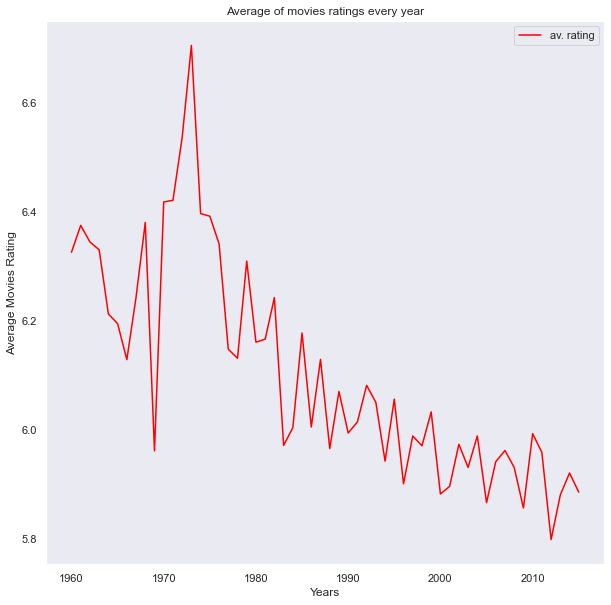

In [36]:
df.groupby('release_year')['vote_average'].mean().plot(color='red',figsize=(10,10),label="av. rating");
plt.title("Average of movies ratings every year");
plt.xlabel("Years")
plt.ylabel("Average Movies Rating")
plt.grid()
plt.legend();

> **Conclusion:** The average ratings score is decreasing over the years. 

### Q13. How are revenues trending over time?

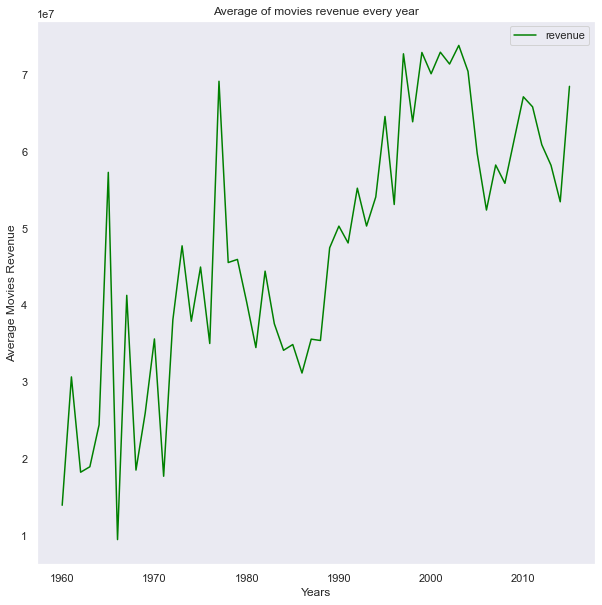

In [37]:
df.query('revenue > 1').groupby('release_year')['revenue'].mean().plot(color='green',figsize=(10,10),label = "revenue");
plt.title("Average of movies revenue every year");
plt.xlabel("Years")
plt.ylabel("Average Movies Revenue")
plt.grid()
plt.legend();

> **Conclusion:** The average revenue of movies is fluctuating over the years (High Standard Deviation) but with an increasing trend. 

### Q14. How does number of movies produced differs yearly?

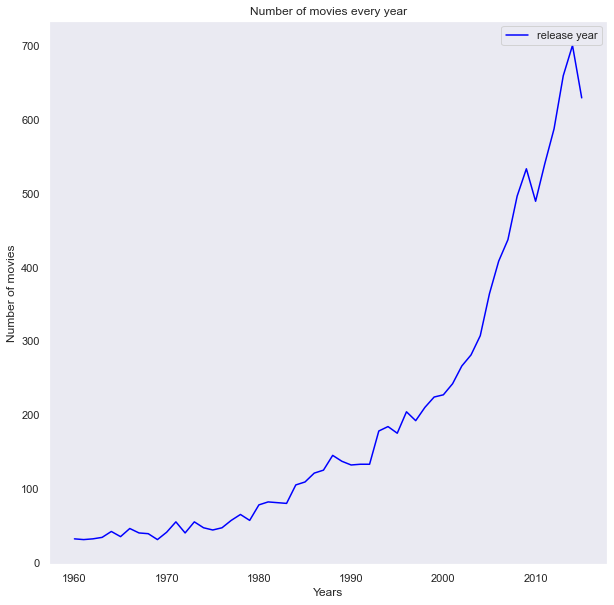

In [38]:
df['release_year'].value_counts().sort_index().plot(color='blue',figsize=(10,10),label = "release year");
plt.title("Number of movies every year");
plt.xlabel("Years")
plt.ylabel("Number of movies")
plt.grid()
plt.legend();

> **Conclusion:** The trend here is very obvious, There is a significant increase in the count of new movies every year. 

### Q15.How is popularity trending over time?

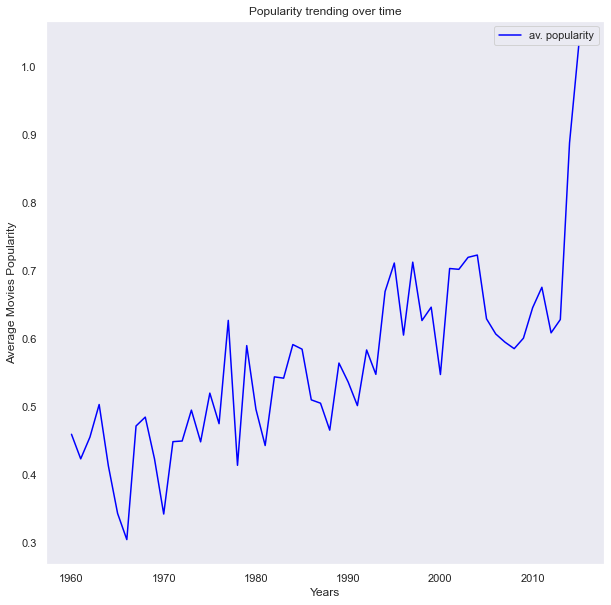

In [39]:
df.groupby('release_year')['popularity'].mean().plot(color='blue',figsize=(10,10),label = 'av. popularity');
plt.title("Popularity trending over time");
plt.xlabel("Years")
plt.ylabel("Average Movies Popularity")
plt.grid()
plt.legend();

> **Conclusion:** popularity was increasing at a pace but since after 2010, people seem to gain more interest in movies as there is a sudden peak in popularity of movies in time

### Q16. Do top ratings movies always generate big revenue?

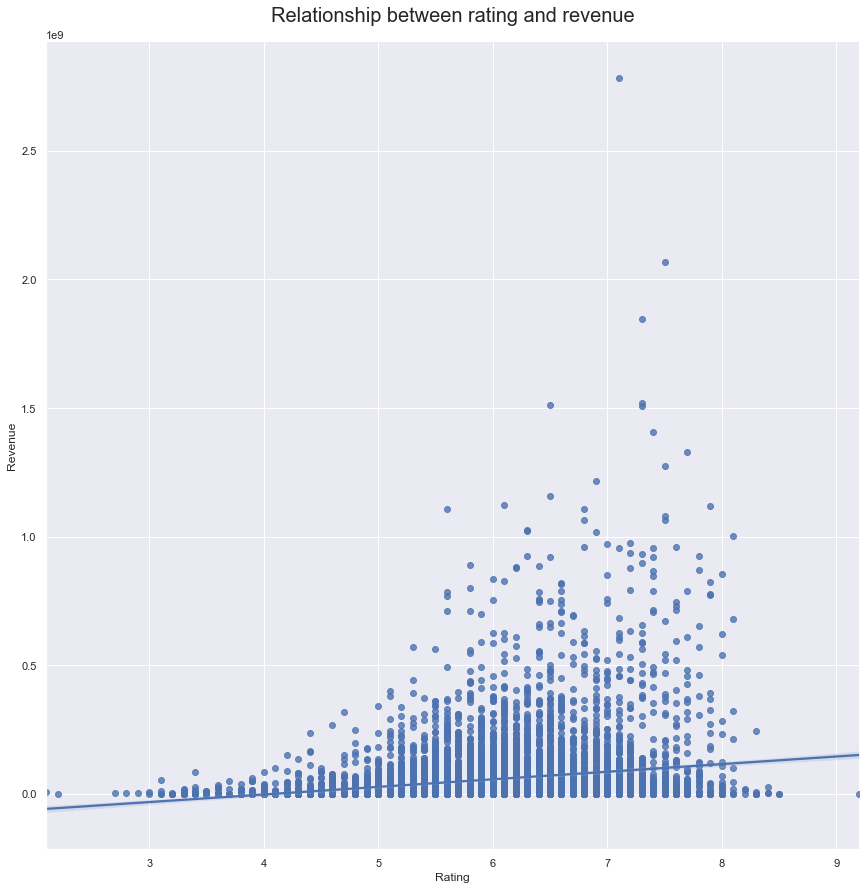

In [40]:
plot = sns.lmplot(x='vote_average',y='revenue',data=df.query('revenue > 1'),fit_reg=True,height=12,aspect=1,);
plt.title("Relationship between rating and revenue", fontdict={'fontsize':20}, pad=20)
plot.set_axis_labels("Rating","Revenue");

> **Conclusion:** There is a positive correlation between vote ratings and revenue but it is not that strong

### Q17.How is runtime trending over time?

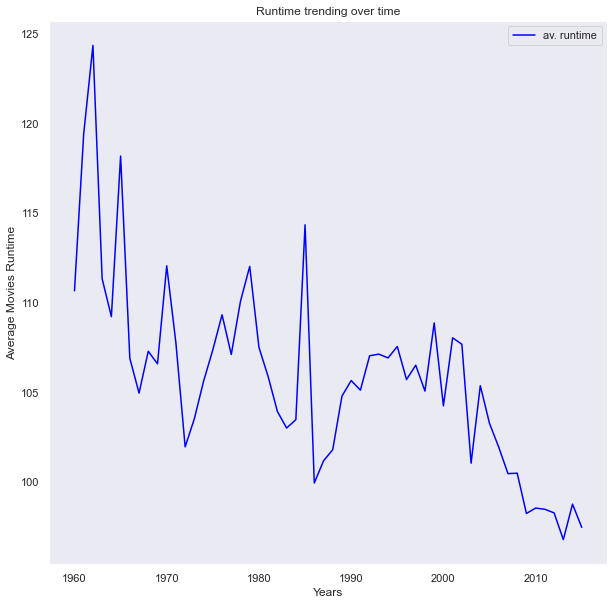

In [41]:
df.query('runtime > 0').groupby('release_year')['runtime'].mean().plot(color='blue',figsize=(10,10),label = "av. runtime");
plt.title("Runtime trending over time");
plt.xlabel("Years")
plt.ylabel("Average Movies Runtime")
plt.grid()
plt.legend();

> **Conclusion:** Modern directors seem to prefer shorter movies as the runtime is decreasing over time.

### Q18.Is there any impact of popularity on revenue?

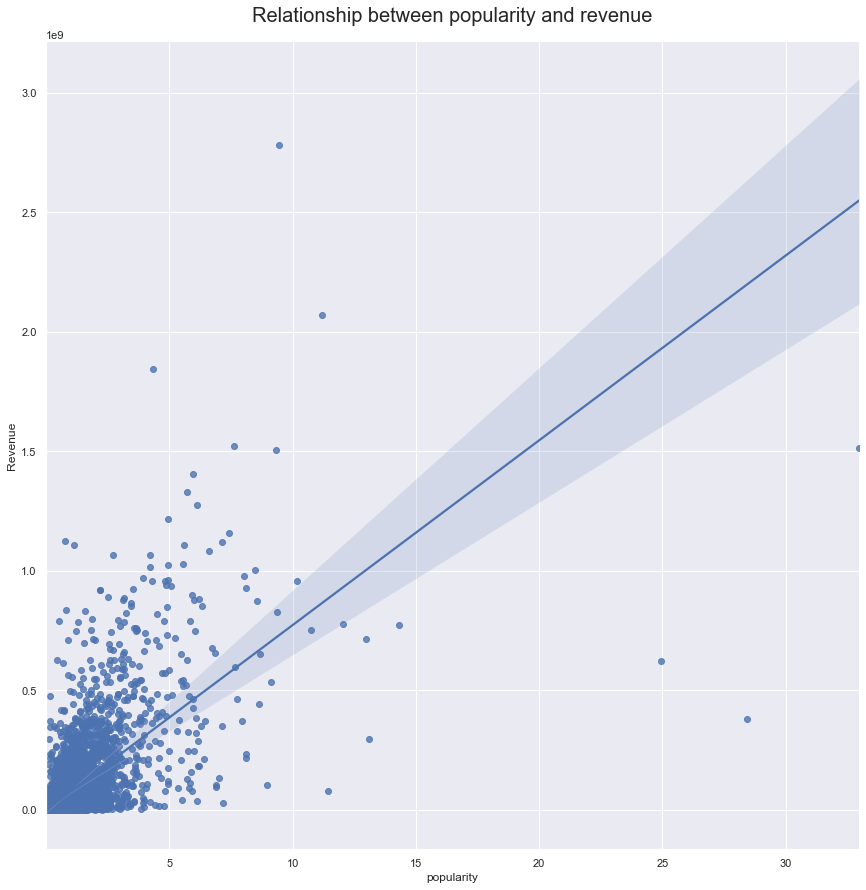

In [45]:
plot = sns.lmplot(x='popularity',y='revenue',data=df.query("revenue > 1"),fit_reg=True,height=12,aspect=1,);
plt.title("Relationship between popularity and revenue", fontdict={'fontsize':20}, pad=20)
plot.set_axis_labels("popularity","Revenue");

> **Conclusion:** Yes! There is a great impact of popularity on the revenue of the movie

### Q19. What kinds of properties are associated with movies that have high revenues?

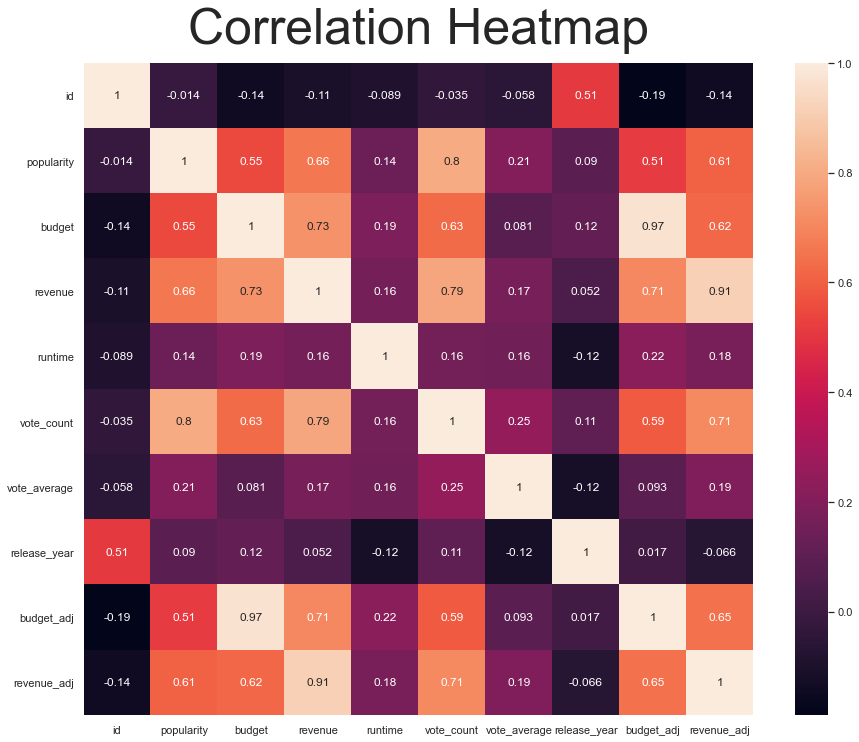

In [43]:
plt.figure(figsize=(15, 12))
heatmap  = sns.heatmap(df.corr(),annot=True);
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':50}, pad=20);

> **Conclusion:** Revenue has strong postive correlation with Popularity, Budget, and Vote Count. 

<a id='conclusions'></a>
## Conclusions

>#### • Drama is the most popular genre, followed by action, comedy and thriller.
>#### • Warner Bros. has by far the largest revenues of 57 Billion USD.
>#### • Universal Pictures produced the largest number of movies of 482 movies.
>#### • Samuel L. Jackson is the most popular actor. However, Christopher Lee spent 55 years of his life acting.
>#### • Robert De Niro was a star actor in 72 movies. and Woody Allen was the director in 46 movies.
>#### • The director with the highest votes average is Mark Cousins and Steven Spielberg was a director in movies that generated around 9 Billion USD.
>#### • The average ratings score for every year movies is decreasing.
>#### • The average revenue of movies is fluctuating over the years but with an increasing trend.
>#### • There is a significant increase in the count of new movies every year.
>#### • Popularity was increasing at a pace but since after 2010, people seem to gain more interest in movies as there is a sudden peak in popularity of movies in time
>#### • Higher rating movies are slightly more likely to gain higher revenue as There is a positive correlation between vote ratings and revenue but it is not that strong
>#### • Modern directors seem to prefer shorter movies as the runtime is decreasing over time.
>#### • There is a great impact of popularity on the revenue of the movie
>#### • Revenue has strong postive correlation with Popularity, Budget, and Vote Count.

>### **<p>Limitation of my exploration:</p>**
><p>    • Alot of data were missing, so alot of data gathering were required to fill these missing data</p>
><p>    • Not all mising data were collected as it wasn't found on IMDB and I believe it it will take much more time to search on the web</p>
